## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [88]:
import math
import io

In [89]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [90]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [91]:
pop = pd.read_csv("grades.csv")

In [92]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

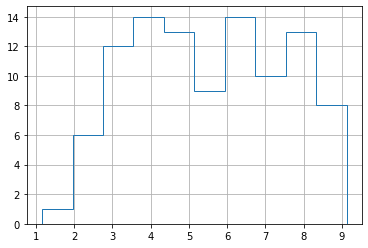

In [93]:
pop.grade.hist(histtype='step')

#### describe the observed values

In [94]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


##### sample 1000 using df.sample()

In [95]:
pop.grade.sample(n=1000, replace=True).describe()

count    1000.000000
mean        5.489823
std         1.967100
min         1.160899
25%         3.920676
50%         5.713150
75%         7.206693
max         9.120705
Name: grade, dtype: float64

##### ##### sample 1000 using np.random.choice()

In [96]:
r = np.random.choice(pop.grade, size=1000, replace=True)
pd.DataFrame(dict(count=len(r), mean=r.mean(), std=r.std(), min=r.min(), max=r.max()), index=[1]).T

,1
count,1000.000000
mean,5.429214
std,2.007011
min,1.160899
max,9.120705


##### take several samples (replications)

In [97]:
sample_size=100
replicates=1000

bootstrap = pd.DataFrame( {'mean_grade': [pop.grade.sample(sample_size,replace=True).mean() for _ in range(replicates)]})

THESE ARE NOT GRADES - they are means of grades, resampled 1000 times with each replicate from a sample of 100 from the original grades 


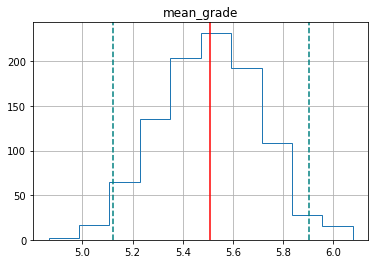

In [98]:
print(f"THESE ARE NOT GRADES - they are means of grades, resampled {replicates} times with each replicate from a sample of {sample_size} from the original grades ")
bootstrap.hist(histtype='step')
pp.axvline(pop.grade.mean(), color='red');
pp.axvline(bootstrap.mean_grade.quantile(.025), color='teal', linestyle='--');
pp.axvline(bootstrap.mean_grade.quantile(.975), color='teal', linestyle='--');

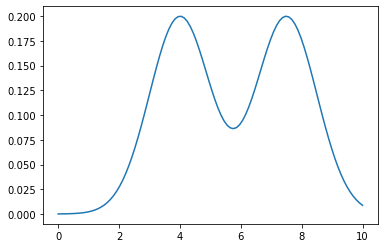

In [99]:
n1 = scipy.stats.norm(loc=7.5,scale=1)
n2 = scipy.stats.norm(loc=4,scale=1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [100]:
def draw():
    while True:
        v = scipy.stats.norm(loc=7.5,scale=1).rvs() if np.random.rand() < 0.5 else scipy.stats.norm(loc=4,scale=1).rvs()
        if 0 <= v <= 10:
            return v

def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

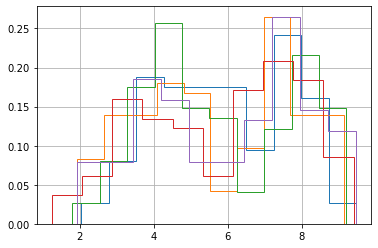

In [101]:
for i in range(5):
    dataset().grade.hist(histtype='step',density=True)

In [104]:
means = pd.DataFrame({'mean_grade': [dataset(100).grade.mean() for i in range(1000)]})

<AxesSubplot:>

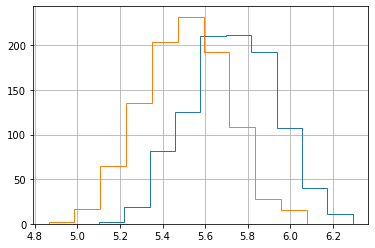

In [106]:
means.mean_grade.hist(histtype='step')
bootstrap.mean_grade.hist(histtype='step')